# N-Beats vs. XGBoost
## Advanced Machine Learning in Finance - Individual Project

The aim of this project is to compare the performance of two machine learning models, N-Beats and XGBoost, for predicting sales figures. The challenge is to use available data that has a correlation with the sales of various companies, such as credit card transactions and geographical data, to predict the quarterly sales figures.

The goal is to compare the accuracy of predictions for the current quarter, as well as the next couple of quarters, between N-Beats and XGBoost.

N-Beats is a deep learning model designed specifically for time-series forecasting, while XGBoost is a popular tree-based model used for various types of predictive modeling. This project aim to give insights into comparative forecasting results from these two models and their applications in the field of sales prediction.

The outcome of this project will be a comparison between the two models, including a discussion of the results and their implications for businesses and organizations looking to improve their financial forecasting capabilities.

In [243]:
import darts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch 
import os
import sys

In [244]:
def create_df(file_name):
    """ 
    
    """
    return pd.read_table(os.path.abspath(file_name))
    
def split_column(df, delimiter, column):
    """ 
    
    """
    split_df = df[column].str.split(delimiter, expand=True)
    split_df.columns = column.split(delimiter)
    split_df = split_df.iloc[:,1:]
    
    return pd.concat([df.drop(column, axis=1), split_df], axis=1)

def convert_columns_to_numeric(df):
    """ 
    
    """
    for col in df.columns:
        try:
            pd.to_numeric(df[col], errors='raise')
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass

    return df

def train_target_slicing(df, target='', time_col='date'):
    """
    
    """
    
    assert target != '', "Target column must be specified"
    assert target in df.columns, "Target column must be in Data Frame columns"
    
    cols_train = list(df.columns)
    cols_train.remove(target)
    col_target = [time_col, target]
    
    X, y = df[cols_train], df[col_target]
    return  X, y

def train_test_split(df, proportion_train, col_target='', time_col='date'):
    """ 
    
    """
    df['date'] = pd.to_datetime(df['date'], format='%d %b %Y')
    df['date'].dt.to_period('D')
   
    X, y = train_target_slicing(df=df, target=col_target, time_col=time_col)
    n = X.shape[0]
    n_train = int( n * proportion_train )
    return X.iloc[:n_train,:], y.iloc[:n_train,:], X.iloc[n_train:,:], y.iloc[n_train:,:]

def set_date(df):
    """ 
    
    """
    df['date'] = pd.to_datetime(df['date'], format='%d %b %Y')
    # df['date'] =  df['date'].dt.to_period('D')
    return df

In [245]:
apl = create_df('itunes_18-19.csv')
apl = split_column(apl, delimiter=';', column=';date;avg_ticket_amount_a;num_customers_a;num_transactions_a;total_sales_a')
apl = convert_columns_to_numeric(apl)
apl = set_date(apl)
print(apl.shape)
apl.head()

(486, 5)


,date,avg_ticket_amount_a,num_customers_a,num_transactions_a,total_sales_a
0,2018-05-01,10.38,16,22,228.30
1,2018-05-02,29.08,11,14,407.10
2,2018-05-03,6.72,8,13,87.34
3,2018-05-04,20.59,10,14,288.30
4,2018-05-06,8.72,17,21,183.20


<AxesSubplot: >

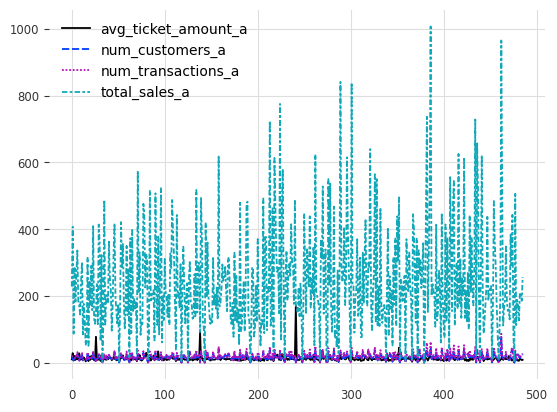

In [246]:
sns.lineplot(data=apl)

In [242]:
from darts.models import NBEATSModel
from darts import TimeSeries

def create_darts_series_from_df(df, time_col='date', freq='D'):
    """  
    
    """
    return TimeSeries.from_dataframe(df=df, time_col=time_col, freq=freq)

def create_NBEATS_model_from_series(series):
    """ 
    
    """
    model = NBEATSModel(input_chunk_length=apl.shape[0], output_chunk_length=len(apl)//4)
    model.fit(series=series[-1], past_covariates=series[:-1] ,verbose=True);

ValueError: The train dataset does not contain even one training sample. This is likely due to the provided training series being too short. This model expect series of length at least 607.


float64


ValueError: The train dataset does not contain even one training sample. This is likely due to the provided training series being too short. This model expect series of length at least 607.

In [114]:
model.predict(n=20, label='total_sales_a')

TypeError: predict() got an unexpected keyword argument 'label'